In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from alpha_vantage.timeseries import TimeSeries

In [5]:
x = input("Enter your Stock Token:")
ts = TimeSeries(key='NUY8IH4PLHCREC1U', output_format='pandas')
data , meta_data = ts.get_intraday(symbol = x, interval='1min', outputsize='full')

In [6]:
print(data)

                      1. open   2. high    3. low  4. close  5. volume
date                                                                  
2023-02-17 20:00:00  152.5900  152.6400  152.5900  152.6400     1864.0
2023-02-17 19:59:00  152.5601  152.5601  152.5601  152.5601      221.0
2023-02-17 19:58:00  152.5700  152.5700  152.5600  152.5600      618.0
2023-02-17 19:57:00  152.5600  152.5600  152.5600  152.5600     1185.0
2023-02-17 19:56:00  152.5500  152.5500  152.5500  152.5500      481.0
...                       ...       ...       ...       ...        ...
2023-02-06 04:05:00  152.8372  152.8372  152.7773  152.7873     3419.0
2023-02-06 04:04:00  152.8073  152.8073  152.7973  152.7973      682.0
2023-02-06 04:03:00  152.6874  152.7773  152.6775  152.7773     2009.0
2023-02-06 04:02:00  152.8772  152.8772  152.7673  152.7773     6325.0
2023-02-06 04:01:00  153.2765  153.2765  152.8871  152.9371     9127.0

[7835 rows x 5 columns]


Text(0.5, 1.0, 'Close price of the stock')

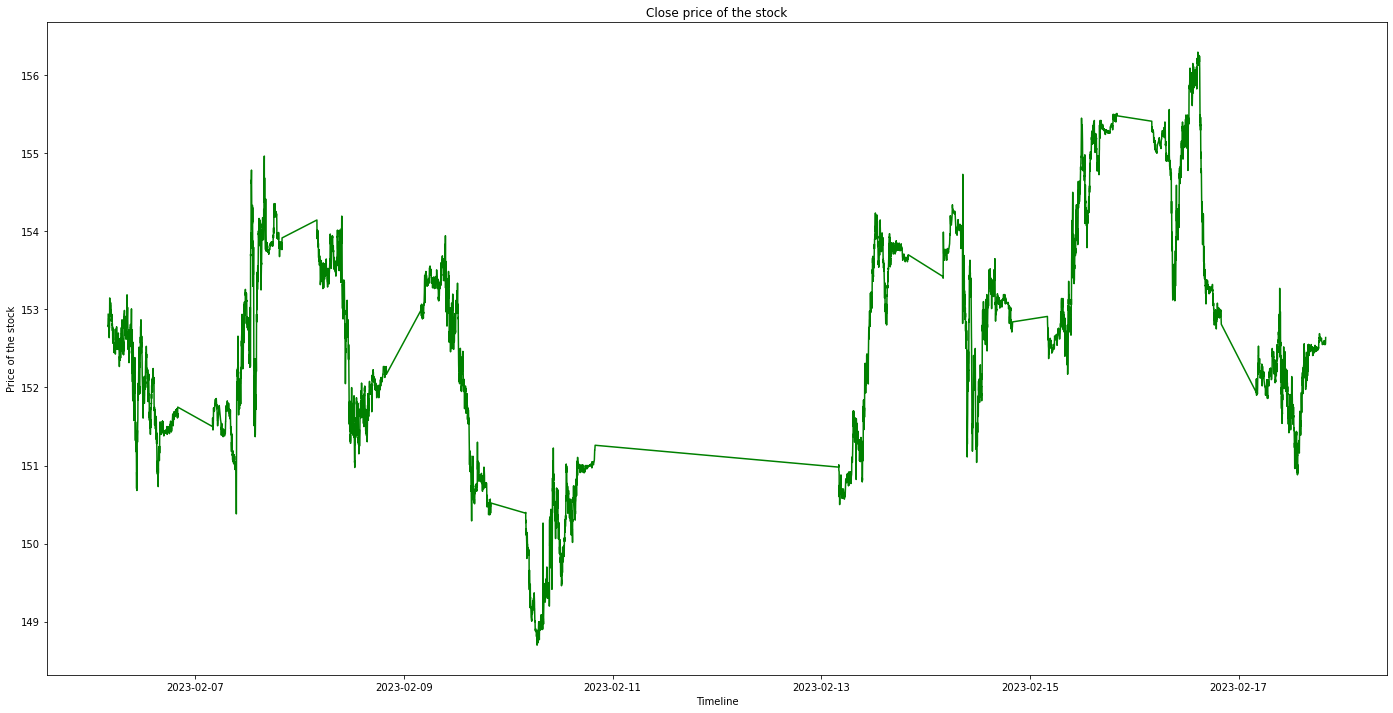

In [11]:
close_data = data['4. close']
plt.figure(figsize=(24,12))
plt.plot(close_data,'g')
plt.xlabel("Timeline")
plt.ylabel("Price of the stock")
plt.title('Close price of the stock')

In [8]:
percentage_change = close_data.pct_change()
print(percentage_change)

date
2023-02-17 20:00:00             NaN
2023-02-17 19:59:00   -5.234539e-04
2023-02-17 19:58:00   -6.554794e-07
2023-02-17 19:57:00    0.000000e+00
2023-02-17 19:56:00   -6.554798e-05
                           ...     
2023-02-06 04:05:00   -1.956586e-04
2023-02-06 04:04:00    6.545047e-05
2023-02-06 04:03:00   -1.308924e-04
2023-02-06 04:02:00    0.000000e+00
2023-02-06 04:01:00    1.045967e-03
Name: 4. close, Length: 7835, dtype: float64


Text(0.5, 1.0, 'percentage_change of the stock')

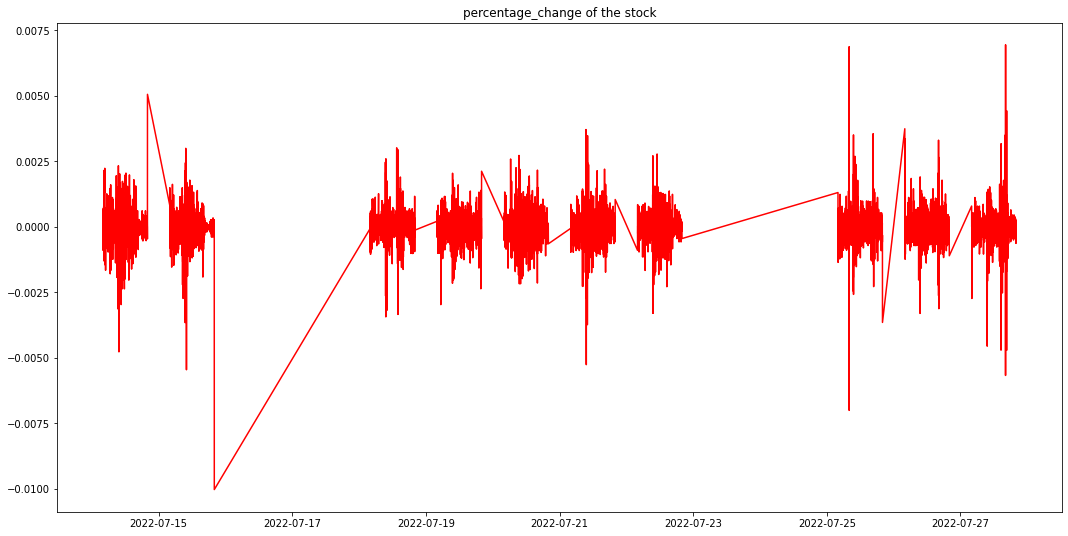

In [21]:
plt.figure(figsize=(18,9))
plt.plot(percentage_change,'r')
plt.title('percentage_change of the stock')

In [9]:
End_pct = percentage_change[-1]

if abs(End_pct) > 0.0004:
    print(x  + ' '+ 'Alert sell'+ str(End_pct))

elif abs(End_pct) < 0.00075:
    print(x +' '+ "Hold your Stock" + str(End_pct) )

elif abs(End_pct) < 0.000200:
    print(x +' '+ "Buy the stock" + str(End_pct))

AAPL Alert sell0.0010459669073874522
